# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [1]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
vehicle_data=pd.read_csv("vehicle.csv")
vehicle_data


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [3]:
# Treating missing values with median
print ("Before missing value treatment: ")
print (vehicle_data.isna().sum())
print ("=======================================")
vehicle_data = vehicle_data.fillna(vehicle_data.median())
print ("After missing value treatment: ")
print (vehicle_data.isna().sum())

Before missing value treatment: 
compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64
After missing value treatment: 
compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         

In [6]:
vehicle_data.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [4]:
from scipy.stats import zscore
vehicle_data_z = vehicle_data.drop(columns='class')
vehicle_data_z = vehicle_data_z.apply(zscore)

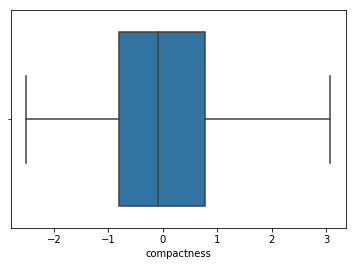

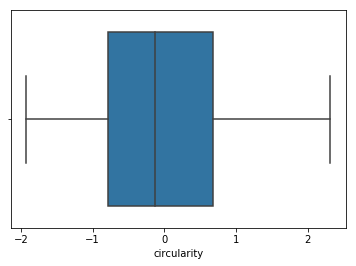

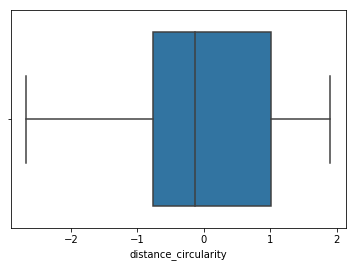

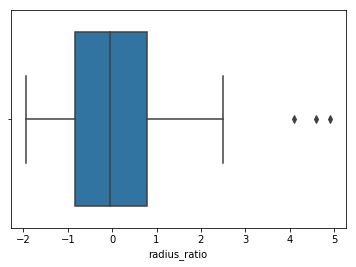

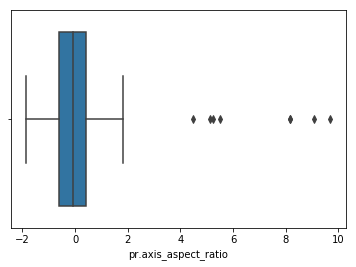

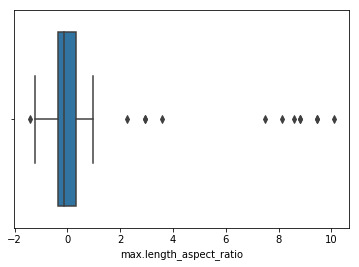

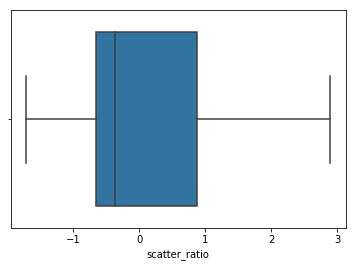

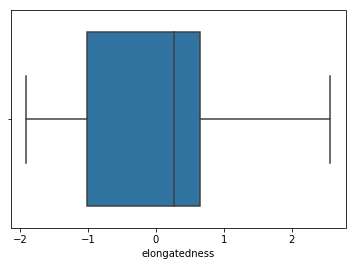

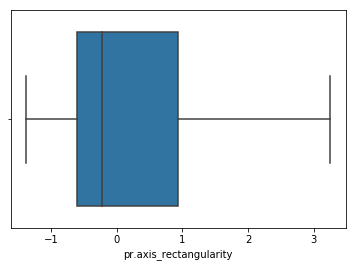

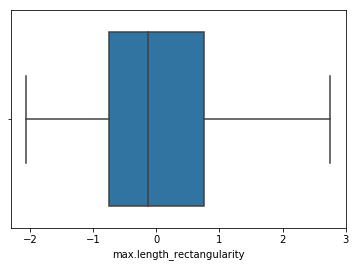

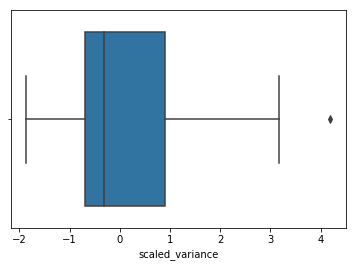

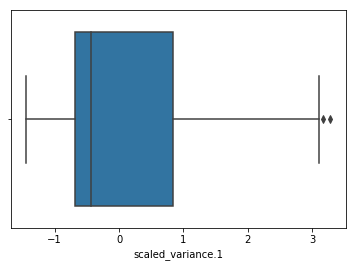

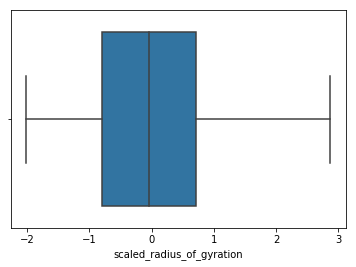

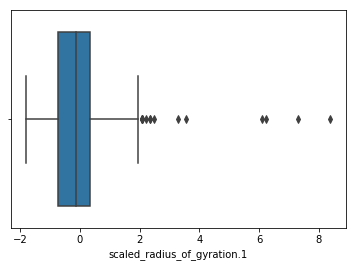

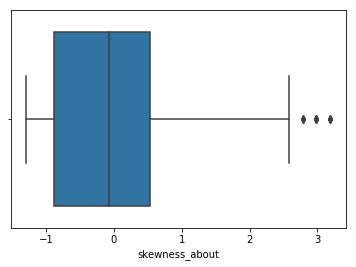

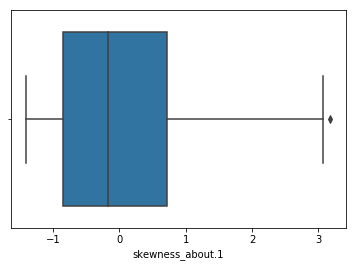

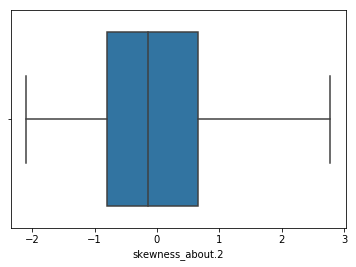

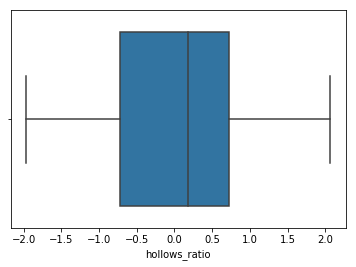

In [5]:
# Let us check for outliers now
#vehicle_data_z.boxplot()

for i, col in enumerate(vehicle_data_z):
    plt.figure(i)
    sns.boxplot(vehicle_data_z[col])

# 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [6]:
vehicle_data.groupby(["class"]).count()


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
bus,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218
car,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
van,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AE4BDD8>,
      dtype=object)

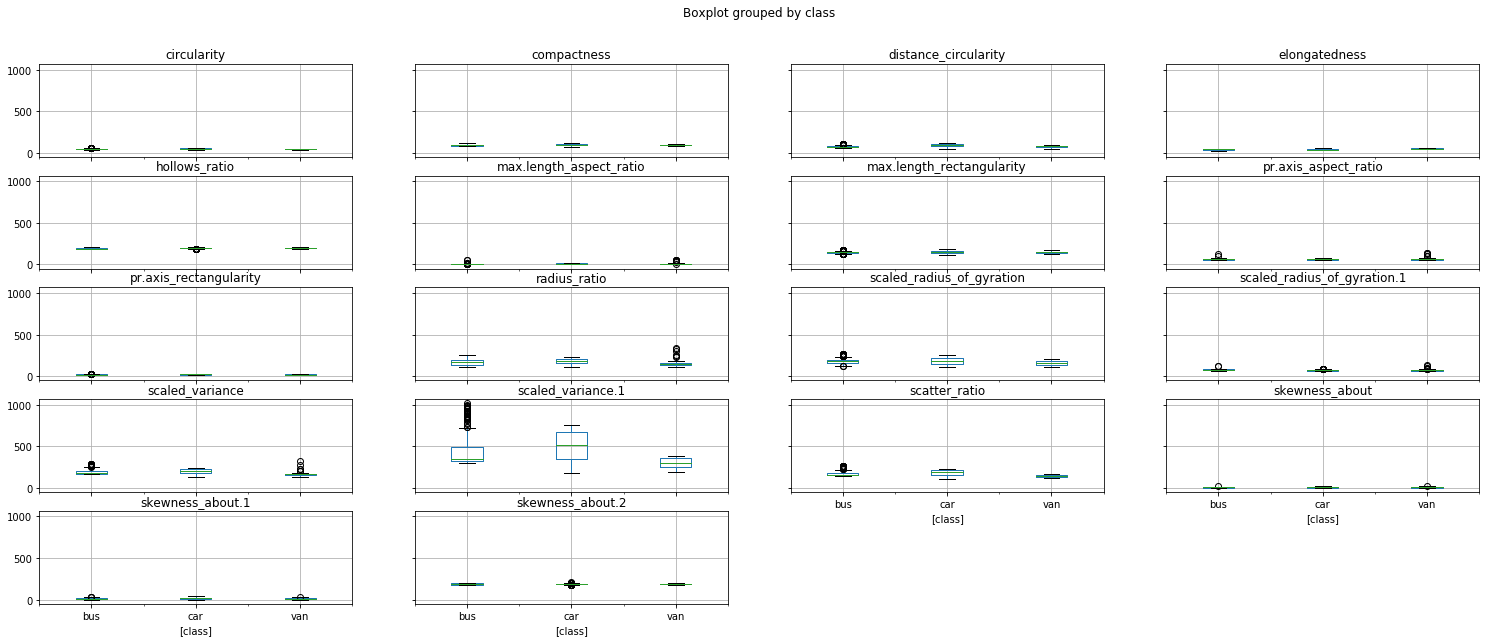

In [7]:
vehicle_data.boxplot(by='class',figsize=(25, 10))

In [8]:
vehicle_x = vehicle_data.drop('class',axis = 1)

In [9]:
x=vehicle_x.iloc[:,:].values
x

array([[ 95.,  48.,  83., ...,  16., 187., 197.],
       [ 91.,  41.,  84., ...,  14., 189., 199.],
       [104.,  50., 106., ...,   9., 188., 196.],
       ...,
       [106.,  54., 101., ...,   4., 187., 201.],
       [ 86.,  36.,  78., ...,  25., 190., 195.],
       [ 85.,  36.,  66., ...,  18., 186., 190.]])

In [10]:
y = vehicle_data['class']
from sklearn.preprocessing import StandardScaler

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 10)

In [13]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

# Q6 Create a covariance matrix for identifying Principal components

In [15]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00169205  0.69510999  0.79093174  0.68430087  0.10533174  0.13879193
   0.81466568 -0.79249053  0.81562662  0.69493762  0.75883574  0.81360243
   0.6018784  -0.23802643  0.21659465  0.16129088  0.29107259  0.36229106]
 [ 0.69510999  1.00169205  0.80101871  0.63753441  0.17332159  0.23038915
   0.85124238 -0.82911962  0.84353731  0.96223666  0.79821698  0.8377724
   0.92490531  0.04164937  0.12317003  0.0144264  -0.08843129  0.06521593]
 [ 0.79093174  0.80101871  1.00169205  0.76084958  0.1703543   0.25346094
   0.90364003 -0.91115044  0.89344273  0.79364077  0.85618354  0.88392536
   0.72188889 -0.20587281  0.09535999  0.26881961  0.13214005  0.3236881 ]
 [ 0.68430087  0.63753441  0.76084958  1.00169205  0.68494799  0.47133546
   0.72992301 -0.78442329  0.7057782   0.60117669  0.79595443  0.7127739
   0.55325762 -0.13680084  0.02938361  0.17620666  0.36656842  0.46385678]
 [ 0.10533174  0.17332159  0.1703543   0.68494799  1.00169205  0.6847859
   0.10994971 -

In [16]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
##e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eigenvectors)
print('\nEigenvalues \n%s' %eigenvalues)

Eigenvectors 
[[ 0.2750839   0.12784374  0.1159604  -0.0736998  -0.08298631  0.16619902
   0.45405819  0.57945595  0.45440883 -0.28074428  0.00669863  0.00114313
  -0.14760701 -0.01457711 -0.03256055 -0.00732469  0.06280839 -0.0157956 ]
 [ 0.29404423 -0.10880657  0.03079054 -0.18229829  0.08792926 -0.3373792
  -0.23559572  0.18743624  0.01850061  0.10009676  0.01430145 -0.25384239
  -0.0429882  -0.00962968  0.59042417  0.07967834  0.27177991  0.38674013]
 [ 0.30389322  0.06858713  0.05482235  0.07330541 -0.04192866 -0.14120194
   0.10595199 -0.42917571  0.15267079 -0.29970476  0.67874648  0.00159816
   0.22008418  0.01367399 -0.10866774 -0.02798734  0.02168137  0.20478086]
 [ 0.26773956  0.18302728 -0.2798132   0.03342543  0.04092307  0.24027635
  -0.20548136 -0.10129102  0.22894938 -0.05111382 -0.11218906 -0.15970214
   0.08246966 -0.05723396  0.31649807 -0.08456967 -0.70003175 -0.05429457]
 [ 0.08583396  0.12126425 -0.62930797 -0.04493283  0.04342769  0.19801449
  -0.40626343  0.0618

In [17]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.433349967135207, array([ 0.2750839 ,  0.29404423,  0.30389322,  0.26773956,  0.08583396,
        0.0933491 ,  0.31612462, -0.3135544 ,  0.31293035,  0.28687477,
        0.30790904,  0.31257102,  0.27469536, -0.01603323,  0.03417219,
        0.0619144 ,  0.02726816,  0.0728572 ])), (2.9476205301640843, array([ 0.12784374, -0.10880657,  0.06858713,  0.18302728,  0.12126425,
       -0.00708186, -0.05144541, -0.01131229, -0.06074579, -0.09673598,
       -0.07070184, -0.05728709, -0.1973884 , -0.48926852,  0.04813198,
        0.09854366,  0.55027547,  0.54916227])), (1.984960071385713, array([ 0.1159604 ,  0.03079054,  0.05482235, -0.2798132 , -0.62930797,
       -0.59378358,  0.10213005, -0.06594628,  0.11316678,  0.01598457,
       -0.06707433,  0.11264615,  0.04074117, -0.30552013,  0.10743659,
        0.04637073, -0.00814786, -0.04364967])), (1.161100268146991, array([-0.0736998 , -0.18229829,  0.07330541,  0.03342543, -0.04493283,
       -0.0272523 ,  0.08913545, -0.0777063 ,  0.08

In [18]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)
print("Variance Explained", var_exp)

Cumulative Variance Explained [ 52.31897364  68.66698164  79.67590997  86.1155708   91.32994925
  94.1605679   96.07303936  97.30920173  98.16726321  98.68163649
  99.07527727  99.33960144  99.54801945  99.70278098  99.81982575
  99.91558382  99.97832803 100.        ]
Variance Explained [52.318973635293794, 16.348008007948327, 11.00892832384531, 6.4396608340359585, 5.214378444664295, 2.83061865122694, 1.912471458324824, 1.2361623745000812, 0.858061479738095, 0.5143732769816189, 0.39364078718214174, 0.26432417034161604, 0.20841800953703074, 0.154761524912186, 0.11704477567028759, 0.09575806668698347, 0.0627442104590822, 0.021671968651412875]


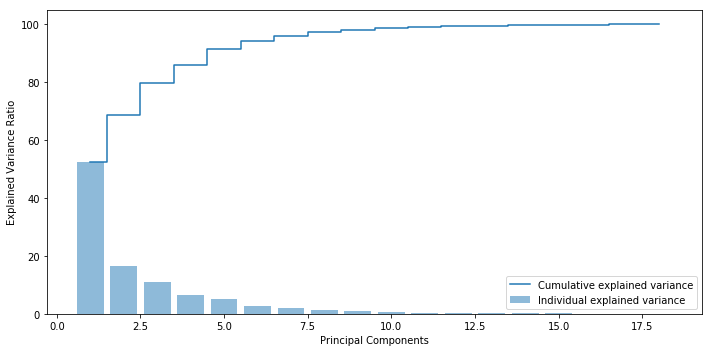

In [19]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [20]:
 ## Step 4: Project data onto lesser dimensions

P_reduce = np.array(eigvectors_sorted[0:8])   # Reducing from 9 to 8 dimension space

Proj_data_8D = np.dot(X_train_sd,P_reduce.T)   # projecting original data into principal component dimensions
Proj_data_df = pd.DataFrame(Proj_data_8D)  # converting array to dataframe for pairplot

In [21]:
X_train_sd.shape,P_reduce.shape, Proj_data_8D.shape



((592, 18), (8, 18), (592, 8))

In [22]:
Proj_data_df.head()

,0,1,2,3,4,5,6,7
0,0.419108,1.298192,-0.036039,-0.883186,1.057458,-0.372926,-0.695602,-0.468230
1,4.488614,-0.212347,-0.021297,0.744075,0.585561,-0.765225,-0.078549,0.621228
2,-0.017389,-0.750266,-0.522947,0.261860,0.315693,-1.647051,-0.387187,0.281439
3,3.842646,1.020876,-0.274158,2.432966,-1.228044,-0.064552,-0.752126,-0.025981
4,-2.090631,-0.985071,-0.242822,0.122222,0.970774,0.236177,0.118677,0.146698


# Find correlation between components and features

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


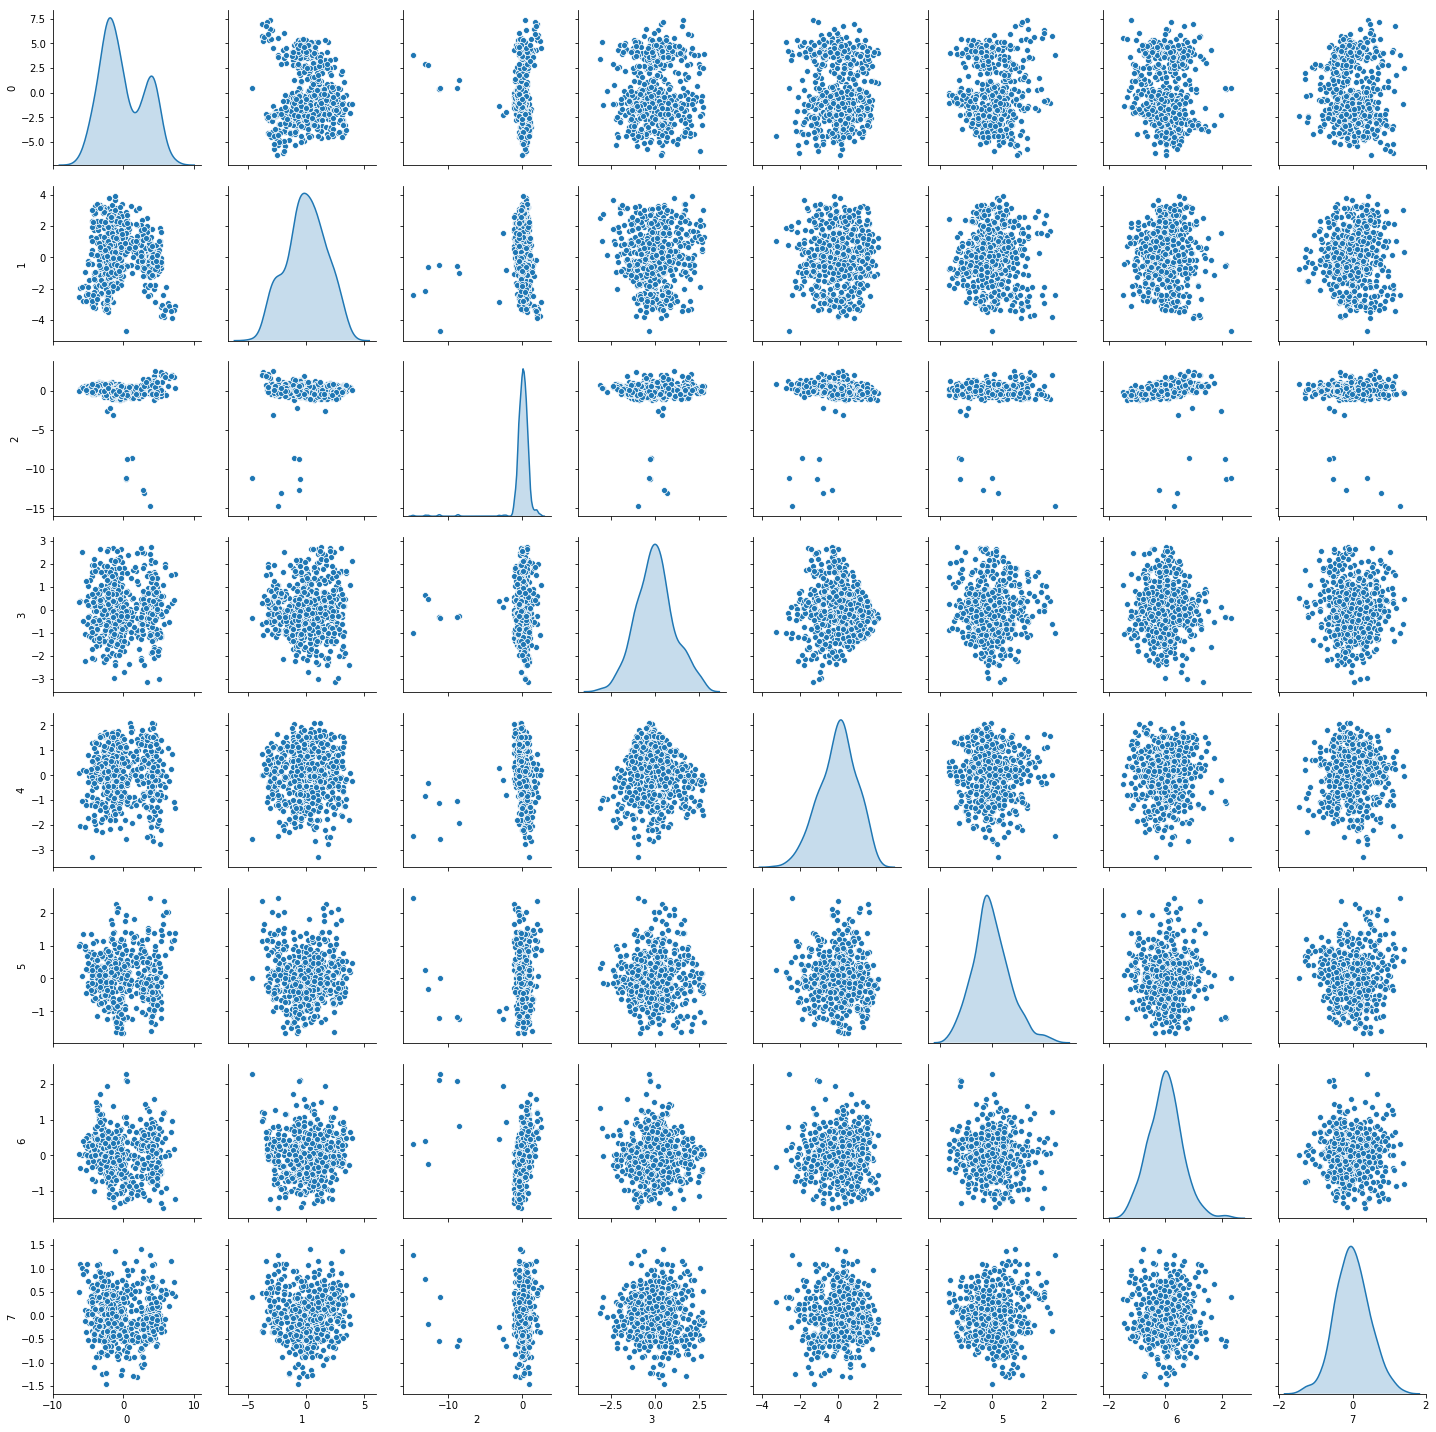

In [23]:
#Let us check it visually
Proj_data_class_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_class_df, diag_kind='kde') 